In [2]:
# Render plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
df = pd.read_csv('ERxApp.csv', encoding="utf-8-sig")
df.columns

Index(['Id', 'EnrollmentrxRx__SIS_ID__c', 'AQ_Candidacy_ID__c', 'Name',
       'School', 'Year', 'Term', 'CurrentCounsellor', 'Region',
       'RegionCounsellor', 'AppOwner', 'DashboardOwner', 'Date_Inquiry__c',
       'Date_App_Started__c', 'Date_App_Submitted__c', 'Date_App_Complete__c',
       'Date_Admit__c', 'Date_Deposit__c', 'Date_Pre_Enrolled__c',
       'Date_Paid__c', 'Date_Enrolled__c', 'Date_File_Closed__c',
       'LastModified'],
      dtype='object')

In [3]:
# Drop columns.
x = df.drop([
    'Id',
    'EnrollmentrxRx__SIS_ID__c',
    'AQ_Candidacy_ID__c',
    'Name',
    'CurrentCounsellor',
    'RegionCounsellor',
    'AppOwner',
    'DashboardOwner',
    'LastModified'], 1)

# Group by types.
#x.columns.to_series().groupby(x.dtypes).groups

# Convert to datetime.
for field in ['Date_Inquiry__c',
       'Date_App_Started__c', 'Date_App_Submitted__c', 'Date_App_Complete__c',
       'Date_Admit__c', 'Date_Deposit__c', 'Date_Pre_Enrolled__c',
       'Date_Paid__c', 'Date_Enrolled__c', 'Date_File_Closed__c']:
    x[field] = pd.to_datetime(x[field])

# Drop null Inquiries.
x = x.drop(x[x.Date_Inquiry__c.isnull()].index)

# Make sure null Inquiries are not there.
#x[x.Date_Inquiry__c.isnull()]

x[:5]

,School,Year,Term,Region,Date_Inquiry__c,Date_App_Started__c,Date_App_Submitted__c,Date_App_Complete__c,Date_Admit__c,Date_Deposit__c,Date_Pre_Enrolled__c,Date_Paid__c,Date_Enrolled__c,Date_File_Closed__c
0,Extension,2015,Summer,EX Degree Completion Online,2015-04-14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Extension,2015,Fall,EX Degree Completion Online,2015-05-26,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,NaT
2,Extension,2014,Fall,EX Degree Completion Online,2014-07-14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Extension,2014,Spring,EX Degree Completion Online,2014-01-31,2014-01-31,2014-01-31,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Extension,2014,Fall,EX Degree Completion Online,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,NaT


In [4]:
# By School.
x['School'].value_counts()

Undergraduate    67095
Graduate          8219
Extension         4771
ACTS              2695
TLC                187
ESLI               171
Name: School, dtype: int64

In [5]:
# By year/term.
x.groupby(['Year', 'Term']).size()

Year  Term  
2014  Fall      11493
      Spring     1241
      Summer      954
2015  Fall      11491
      Spring     1450
      Summer      924
2016  Fall      12701
      Spring     1528
      Summer      995
2017  Fall      19113
      Spring     1791
      Summer     1207
2018  Fall      10588
      Spring     1433
      Summer      288
2019  Fall       4108
      Spring       98
      Summer        4
2020  Fall       1373
      Spring       19
      Summer        3
2021  Fall        306
      Spring       14
      Summer        2
2022  Fall         11
      Spring        2
2023  Fall          1
dtype: int64

In [6]:
# Top 20 regions.
x['Region'].value_counts()[:20]

UG International Fall                       6486
UG Eastern USA                              5121
School of Graduate Studies North America    5081
UG Ontario                                  4640
UG Alberta                                  3844
UG Western USA                              3579
UG California                               3540
School of Graduate Studies                  3007
EX International                            2206
UG Surrey 1                                 2198
UG Washington South                         2193
UG BC Default                               2143
UG Langley                                  2021
UG Vancouver                                1995
UG Washington North                         1941
ACTS Canada                                 1575
UG BC Transfer Fall                         1456
UG Richmond                                 1420
UG BC Interior                              1330
UG Abbotsford                               1294
Name: Region, dtype:

In [7]:
# Age between stages.
stages = ['Date_Inquiry__c', 'Date_App_Started__c', 'Date_App_Submitted__c', 'Date_App_Complete__c',
       'Date_Admit__c', 'Date_Deposit__c', 'Date_Pre_Enrolled__c',
       'Date_Paid__c', 'Date_Enrolled__c', 'Date_File_Closed__c']
for i in range(0, len(stages)):
    fromstage = stages[i]
    for tostage in stages[i+1:]:
        print("%s => %s" % (fromstage, tostage))
        y = x[tostage] - x[fromstage]
        z = y.value_counts().reset_index()
        print(z.describe())
        #print(y.value_counts()[:20].describe())
        #print(y.value_counts()[:20])        
        print()

Date_Inquiry__c => Date_App_Started__c
                          index             0
count                       742    742.000000
mean   428 days 09:44:09.056603     32.772237
std    329 days 22:21:08.175807    632.461332
min          -46 days +00:00:00      1.000000
25%           182 days 06:00:00      1.000000
50%           369 days 12:00:00      3.000000
75%           627 days 06:00:00      7.000000
max          3576 days 00:00:00  17223.000000

Date_Inquiry__c => Date_App_Submitted__c
                          index             0
count                       726    726.000000
mean   416 days 08:35:42.148760     30.252066
std    320 days 14:14:18.979518    530.995275
min          -46 days +00:00:00      1.000000
25%           179 days 06:00:00      1.000000
50%           361 days 12:00:00      3.000000
75%           607 days 12:00:00      7.000000
max          3576 days 00:00:00  14294.000000

Date_Inquiry__c => Date_App_Complete__c
                          index            0
count

                          index            0
count                       357   357.000000
mean   202 days 07:39:49.915966    18.733894
std    155 days 14:55:26.722096    82.431410
min          -61 days +00:00:00     1.000000
25%            88 days 00:00:00     2.000000
50%           177 days 00:00:00     7.000000
75%           272 days 00:00:00    23.000000
max          1056 days 00:00:00  1540.000000

Date_Admit__c => Date_Paid__c
                          index            0
count                       417   417.000000
mean   227 days 23:01:17.697841    14.800959
std    162 days 15:18:05.390296    64.924966
min          -61 days +00:00:00     1.000000
25%           103 days 00:00:00     2.000000
50%           207 days 00:00:00    11.000000
75%           316 days 00:00:00    18.000000
max           960 days 00:00:00  1323.000000

Date_Admit__c => Date_Enrolled__c
                          index            0
count                       415   415.000000
mean   223 days 23:35:42.650602   

In [8]:
x = x.drop(['Date_File_Closed__c'], 1)

In [9]:
i = 0
stages = {}
for s in ['Date_Inquiry__c', 'Date_App_Started__c', 'Date_App_Submitted__c', 'Date_App_Complete__c',
       'Date_Admit__c', 'Date_Deposit__c', 'Date_Pre_Enrolled__c',
       'Date_Paid__c', 'Date_Enrolled__c']:
    stages[s] = i
    i += 1
stages

{'Date_Inquiry__c': 0,
 'Date_App_Started__c': 1,
 'Date_App_Submitted__c': 2,
 'Date_App_Complete__c': 3,
 'Date_Admit__c': 4,
 'Date_Deposit__c': 5,
 'Date_Pre_Enrolled__c': 6,
 'Date_Paid__c': 7,
 'Date_Enrolled__c': 8}

In [10]:
# Figure out final stage.
def f(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return stages[x.last_valid_index()]
y = x.copy()
y['Final_Stage'] = y.apply(f, axis=1)
y[:5]

,School,Year,Term,Region,Date_Inquiry__c,Date_App_Started__c,Date_App_Submitted__c,Date_App_Complete__c,Date_Admit__c,Date_Deposit__c,Date_Pre_Enrolled__c,Date_Paid__c,Date_Enrolled__c,Final_Stage
0,Extension,2015,Summer,EX Degree Completion Online,2015-04-14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0
1,Extension,2015,Fall,EX Degree Completion Online,2015-05-26,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,2015-08-28,8
2,Extension,2014,Fall,EX Degree Completion Online,2014-07-14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0
3,Extension,2014,Spring,EX Degree Completion Online,2014-01-31,2014-01-31,2014-01-31,NaT,NaT,NaT,NaT,NaT,NaT,2
4,Extension,2014,Fall,EX Degree Completion Online,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,2014-09-05,8


In [11]:
# Look at FA2017 enrolled.
#z = y.loc[(y.Final_Stage == 8) & (y.Year == 2017) & (y.Term == 'Fall') & (y.School == 'Undergraduate')].reset_index().drop('index', 1)
z = y.loc[(y.Final_Stage == 8) & (y.Year == 2017) & (y.Term == 'Fall')].reset_index().drop('index', 1)
z['app'] = z.Date_App_Started__c - z.Date_Inquiry__c
z['sub'] = z.Date_App_Submitted__c - z.Date_App_Started__c
z['com'] = z.Date_App_Complete__c - z.Date_App_Submitted__c
z['adm'] = z.Date_Admit__c - z.Date_App_Complete__c
z['dep'] = z.Date_Deposit__c - z.Date_Admit__c
z['pre'] = z.Date_Pre_Enrolled__c - z.Date_Deposit__c
z['pay'] = z.Date_Paid__c - z.Date_Pre_Enrolled__c
z['enr'] = z.Date_Enrolled__c - z.Date_Paid__c
z = z.drop(['Date_Inquiry__c', 'Date_App_Started__c', 'Date_App_Submitted__c', 'Date_App_Complete__c',
       'Date_Admit__c', 'Date_Deposit__c', 'Date_Pre_Enrolled__c',
       'Date_Paid__c', 'Date_Enrolled__c'], 1)
z.sample(5)

,School,Year,Term,Region,Final_Stage,app,sub,com,adm,dep,pre,pay,enr
545,Undergraduate,2017,Fall,UG Ontario,8,0 days,1 days,6 days,7 days,22 days,60 days,1 days,35 days
573,Undergraduate,2017,Fall,UG BC Interior,8,0 days,17 days,50 days,1 days,54 days,55 days,93 days,40 days
694,Graduate,2017,Fall,School of Graduate Studies North America,8,0 days,0 days,74 days,3 days,7 days,71 days,55 days,0 days
332,ACTS,2017,Fall,ACTS Canada,8,1 days,0 days,6 days,3 days,12 days,2 days,35 days,46 days
101,Undergraduate,2017,Fall,UG Alberta,8,10 days,26 days,210 days,1 days,5 days,1 days,17 days,18 days


In [12]:
for stage in ['app', 'sub', 'com', 'adm','dep','pre','pay','enr']:
    onestage = pd.DataFrame(z[stage])
    print(onestage.loc[onestage[stage] == pd.Timedelta('0 days')].count())

app    645
dtype: int64
sub    563
dtype: int64
com    349
dtype: int64
adm    399
dtype: int64
dep    208
dtype: int64
pre    125
dtype: int64
pay    111
dtype: int64
enr    193
dtype: int64


In [13]:
for stage in ['app', 'sub', 'com', 'adm','dep','pre','pay','enr']:
    z[stage] = z[stage].astype(int)/(60*60*24*1000000000)

(0.8376102447509766, 1.8961709413227227e-30)
NormaltestResult(statistic=114.99639912742907, pvalue=1.068683760786464e-25)


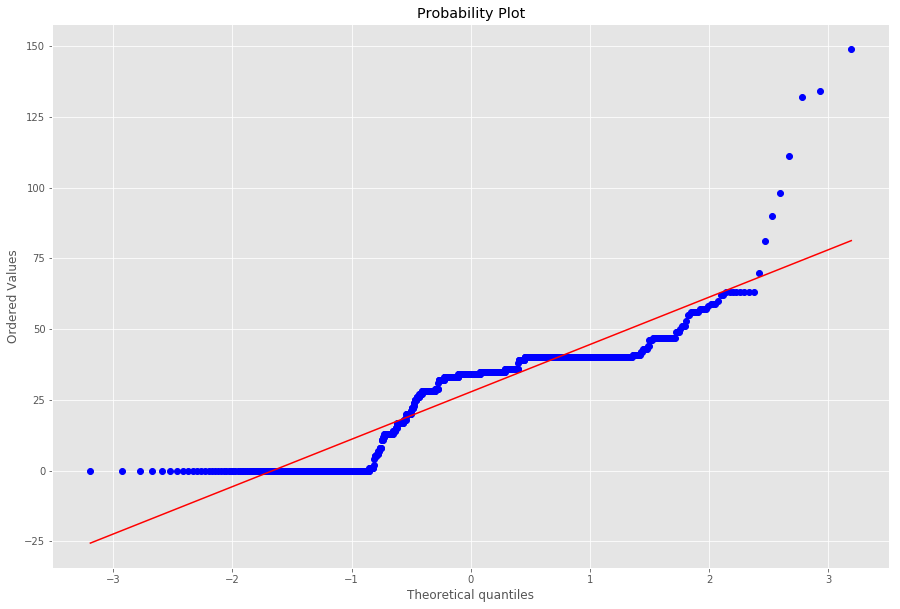

In [14]:
stage = 'enr'
print(stats.shapiro(z[stage]))
print(stats.normaltest(z[stage]))
prob = stats.probplot(z[stage], dist='norm', plot=plt)

(0.790366530418396, 1.2928573995202499e-30)
NormaltestResult(statistic=408.65442266395775, pvalue=1.8273410726157084e-89)


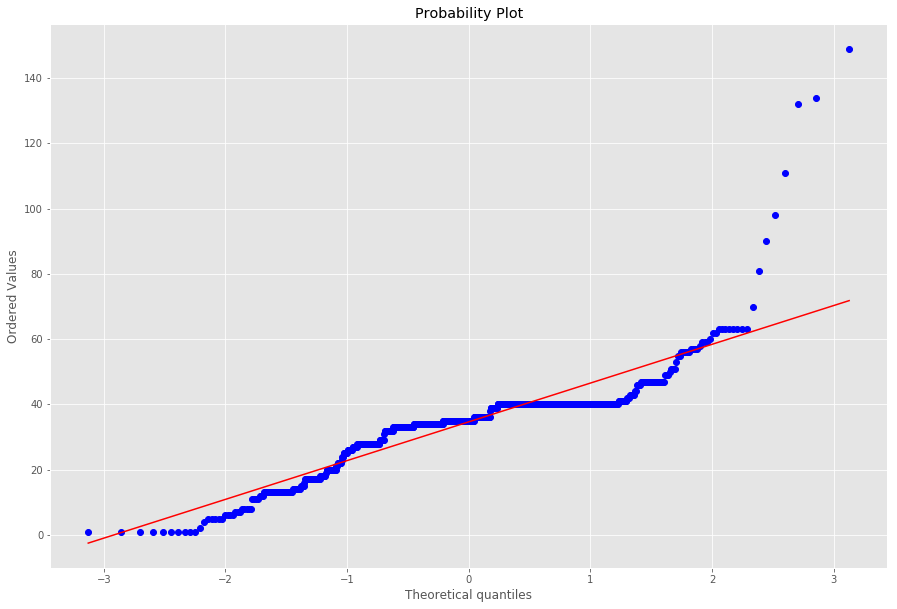

In [15]:
stage = 'enr'
nonzero = z[stage].loc[z[stage] != 0]
print(stats.shapiro(nonzero))
print(stats.normaltest(nonzero))
prob = stats.probplot(nonzero, dist='norm', plot=plt)

(0.8925363421440125, 7.108854126190253e-23)
NormaltestResult(statistic=84.4944615400347, pvalue=4.490149497556674e-19)


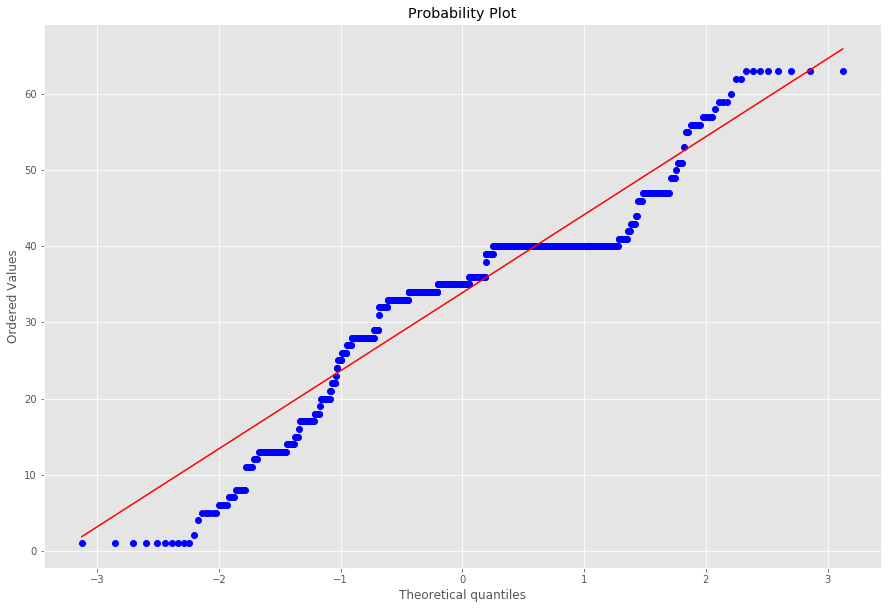

In [25]:
stage = 'enr'
nonoutlier = z[stage].loc[z[stage] > 0].loc[z[stage] < 65]
print(stats.shapiro(nonoutlier))
print(stats.normaltest(nonoutlier))
prob = stats.probplot(nonoutlier, dist='norm', plot=plt)